In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

**High bias model (simple)**

In [4]:
high_bias = LogisticRegression()
high_bias.fit(x_train, y_train)

train_score_bias = high_bias.score(x_train, y_train)
test_score_bias = high_bias.score(x_test, y_test)

print("High Bias Model:")
print(f"  Train: {train_score_bias:.3f}, Test: {test_score_bias:.3f}")
print(f"  Gap: {train_score_bias - test_score_bias:.3f}")

High Bias Model:
  Train: 0.882, Test: 0.855
  Gap: 0.027


**High variance model (complex)**

In [6]:
high_variance = DecisionTreeClassifier(max_depth=20)
high_variance.fit(x_train, y_train)

train_score_var = high_variance.score(x_train, y_train)
test_score_var = high_variance.score(x_test, y_test)

print("High Variance Model:")
print(f"  Train: {train_score_var:.3f}, Test: {test_score_var:.3f}")
print(f"  Gap: {train_score_var - test_score_var:.3f}")

High Variance Model:
  Train: 1.000, Test: 0.850
  Gap: 0.150


**Finding the Balance**

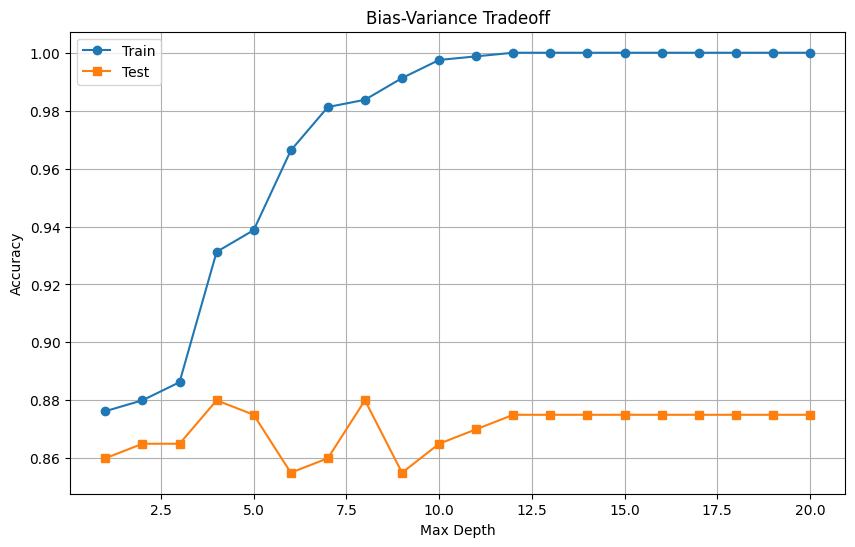

Optimal depth: 4


In [7]:
import matplotlib.pyplot as plt
import numpy as np

max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(x_train, y_train)
    train_scores.append(tree.score(x_train, y_train))
    test_scores.append(tree.score(x_test, y_test))


plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Train')
plt.plot(max_depths, test_scores, 's-', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


optimal_depth = max_depths[np.argmax(test_scores)]
print(f"Optimal depth: {optimal_depth}")